# Modelling

In this section we intend to use the K nearest neighbor machine learning algorithm to forecast NOx pollution levels. The machine learning model was created for stations Arturo Soria, Avda. Ramón y Cajal, barrio del pillar, casa de campo, cuatro caminos, Escuelas Aguirre, farolillo, Moratalaz , Pza. de España, pza de carmen, Vallecas, Villaverde.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sktime.performance_metrics.forecasting import MeanSquaredError

In [26]:
from glob import glob

In [27]:
files = glob("*.csv")

In [28]:
files.sort()

In [29]:
files

['arturo_soria.csv',
 'avda_ram.csv',
 'barajas_Pueblo.csv',
 'barrio_del_pillar.csv',
 'casa_de_campo.csv',
 'castellana.csv',
 'cuatro_caminos.csv',
 'el_pardo.csv',
 'ensanche.csv',
 'escuelas_aguirre.csv',
 'farolillo.csv',
 'juan_carlos.csv',
 'mendez_alvaro.csv',
 'moratalaz.csv',
 'parque_del_retiro.csv',
 'plaza_castilla.csv',
 'pza_Fernandez.csv',
 'pza_de_espa.csv',
 'pza_del_carmen.csv',
 'sanchinarro.csv',
 'stations.csv',
 'tree_olivos.csv',
 'urb_embajada.csv',
 'vallecas.csv',
 'villaverde.csv']

In [30]:
files.remove('stations.csv')

In [31]:
# create a list of station dataframes
df_list = []
for file in files:
    df = pd.read_csv(file)
    df_list.append(df)

In [32]:
files

['arturo_soria.csv',
 'avda_ram.csv',
 'barajas_Pueblo.csv',
 'barrio_del_pillar.csv',
 'casa_de_campo.csv',
 'castellana.csv',
 'cuatro_caminos.csv',
 'el_pardo.csv',
 'ensanche.csv',
 'escuelas_aguirre.csv',
 'farolillo.csv',
 'juan_carlos.csv',
 'mendez_alvaro.csv',
 'moratalaz.csv',
 'parque_del_retiro.csv',
 'plaza_castilla.csv',
 'pza_Fernandez.csv',
 'pza_de_espa.csv',
 'pza_del_carmen.csv',
 'sanchinarro.csv',
 'tree_olivos.csv',
 'urb_embajada.csv',
 'vallecas.csv',
 'villaverde.csv']

In [33]:
#now select the station with have NOx in them
NOx_list = []
ind = [] #index of station that have NOx pollutant in them
for i in range(0,24):
    if 'NOx' in df_list[i].columns:
        NOx_list.append(df_list[i])
        ind.append(i)

In [34]:
# This function helps to process the dataframs into a form that is suitable for Sktime library
def process(dataset):
    station = dataset[['date','NOx']]
    station['date'] = pd.to_datetime(station['date'])
    station.set_index('date', inplace = True)
    station = station.resample("M").mean().fillna(method = 'ffill')#resamples the data from hours to days
    return station

In [35]:
processed_list = [process(i) for i in NOx_list]

/var/folders/ks/cpcnjkt95qx6v7hynw8xydkr0000gp/T/ipykernel_79847/3715272232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['date'] = pd.to_datetime(station['date'])
/var/folders/ks/cpcnjkt95qx6v7hynw8xydkr0000gp/T/ipykernel_79847/3715272232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['date'] = pd.to_datetime(station['date'])
/var/folders/ks/cpcnjkt95qx6v7hynw8xydkr0000gp/T/ipykernel_79847/3715272232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

# A Machine Learning forecasting model for Nitrous oxides pollutant in  station Arturo soria

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

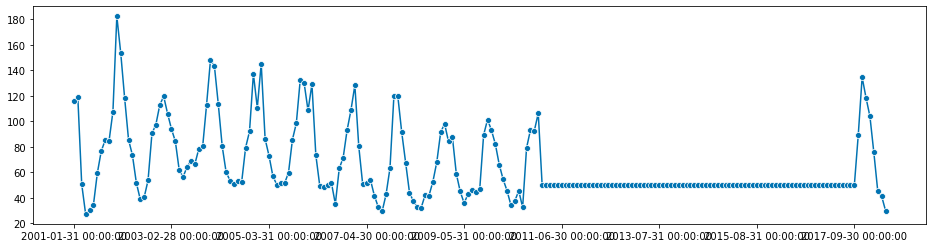

In [36]:
plot_series(processed_list[0])

In [37]:
def EvaluateModels(dataset):
    listOfRegressors = [RandomForestRegressor(n_estimators=30),
                   LinearRegression(), KNeighborsRegressor(n_neighbors=3)]
    list_of_mape = []
    list_of_rmse = []
    for regressor in listOfRegressors:
        x_train, x_test = temporal_train_test_split(dataset, test_size=36)
        reduced_reg = make_reduction(regressor , window_length=10, strategy = 'recursive')
        reduced_reg.fit(x_train)
        sh = list(range(1,37))
        y_pred = reduced_reg.predict(sh)
        list_of_mape.append(mean_absolute_percentage_error(x_test, y_pred))
        list_of_rmse.append(mean_squared_error(x_test, y_pred, squared=True))
    print("The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are {},{},{}".format(list_of_mape[0],list_of_mape[1],list_of_mape[2]))



In [38]:
EvaluateModels(processed_list[0])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.09634757384610398,0.16091037044976197,0.09634757384610398


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

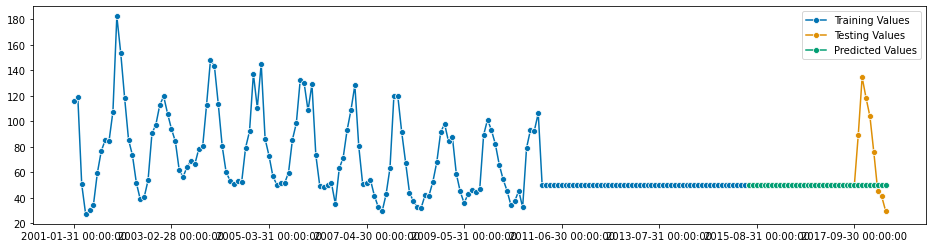

In [39]:
x_train, x_test = temporal_train_test_split(processed_list[0], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [40]:
print("The mean percentage error is for Random forestt {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is for Random forestt 0.09634757384610398


# A Machine Learning forecasting model for Nitrous oxides pollutant in  station Avda ram

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

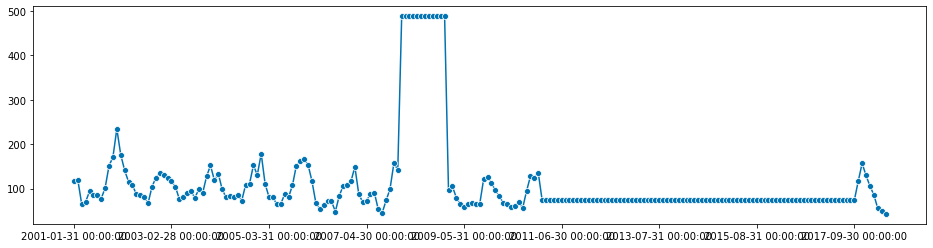

In [41]:
# this is an sktime function for plotting dataset
plot_series(processed_list[1])

In [42]:
EvaluateModels(processed_list[1])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.09225858256232528,0.5569226947617145,0.09225858256232528


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

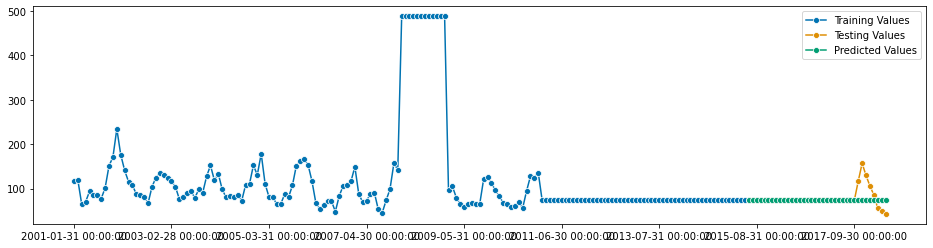

In [47]:
x_train, x_test = temporal_train_test_split(processed_list[1], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])


In [48]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.09225858256232528


#  A Machine Learning forecasting model for Nitrous oxides pollutant in  station barrio del pillar

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

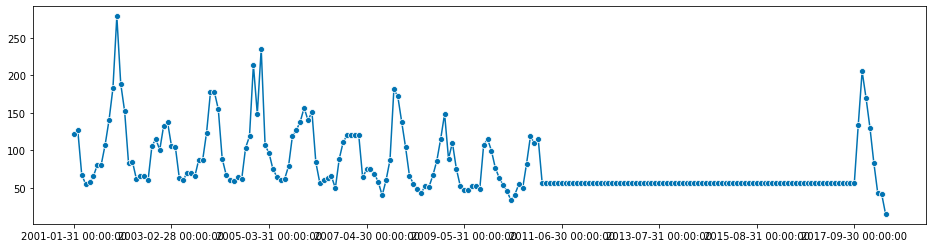

In [49]:
plot_series(processed_list[3])

In [50]:
EvaluateModels(processed_list[3])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.17465191840299704,0.32579225436318426,0.17465191840299704


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

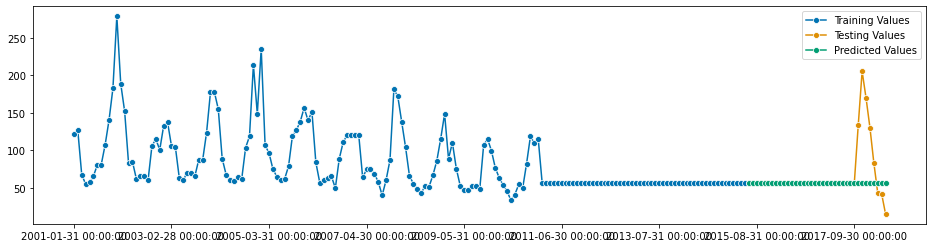

In [51]:
x_train, x_test = temporal_train_test_split(processed_list[3], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [52]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.17465191840299704


# A Machine Learning forecasting model for Nitrous oxides pollutant in  station casa de campo

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

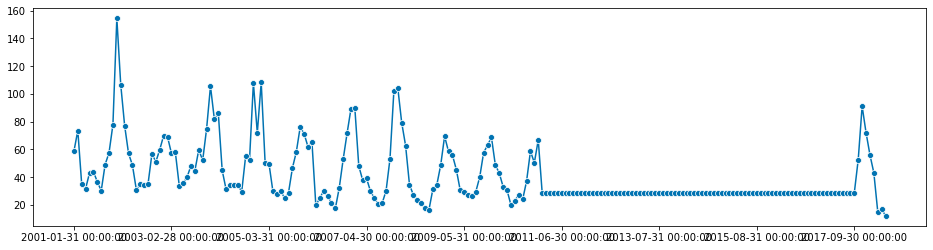

In [53]:
plot_series(processed_list[4])

In [54]:
EvaluateModels(processed_list[4])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.1537515626155254,0.3142523584329523,0.1537515626155254


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

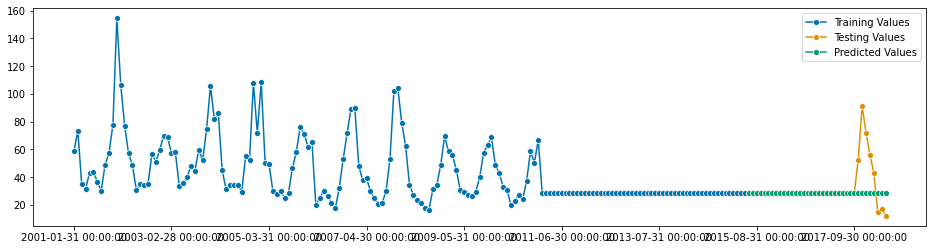

In [55]:
x_train, x_test = temporal_train_test_split(processed_list[4], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=4) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [56]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.1537515626155254


# A Machine Learning forecasting model for Nitrous oxides pollutant in  station Cuatro Caminos

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

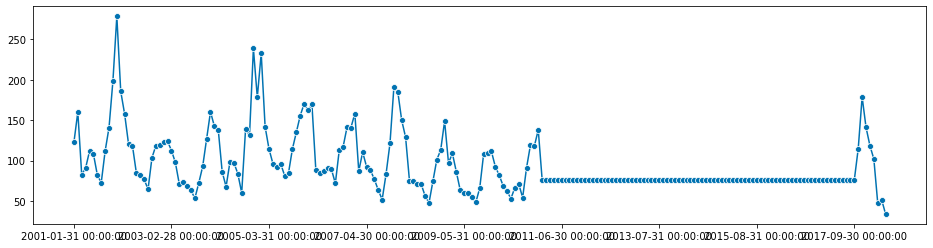

In [57]:
plot_series(processed_list[6])

In [58]:
EvaluateModels(processed_list[6])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.11948150035221916,0.1935339656758133,0.11948150035221916


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

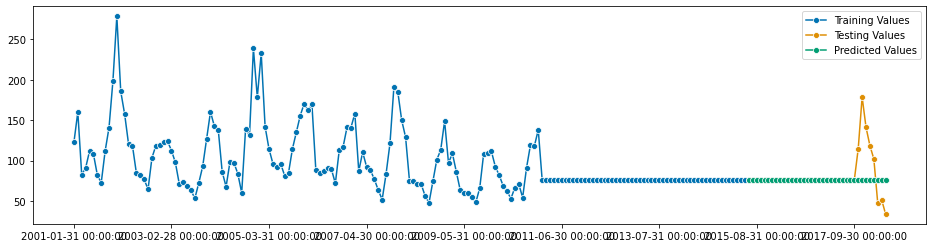

In [59]:
x_train, x_test = temporal_train_test_split(processed_list[6], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [60]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.11948150035221916


# A Machine Learning forecasting model for Nitrous oxides pollutant in  station Escuelas Aguirre

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

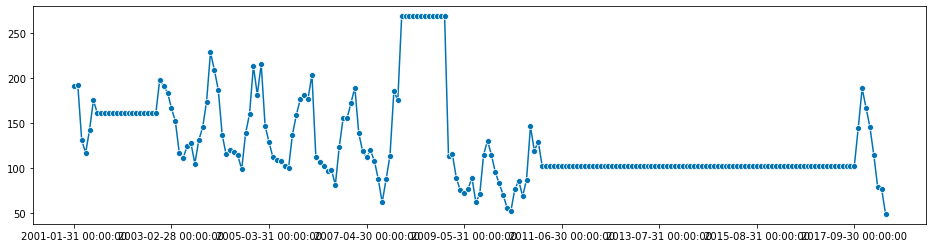

In [61]:
plot_series(processed_list[7])

In [62]:
EvaluateModels(processed_list[7])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.09079983290920451,0.24073341498410702,0.09079983290920451


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

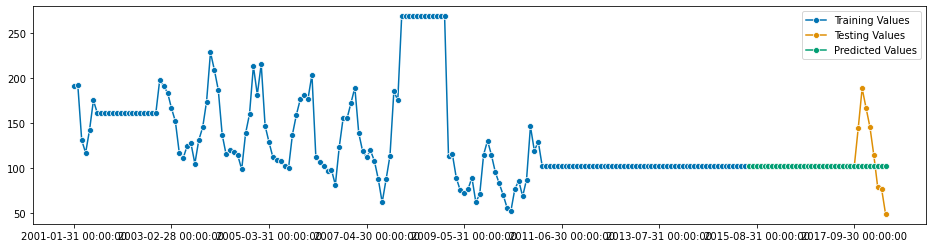

In [63]:
x_train, x_test = temporal_train_test_split(processed_list[7], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [64]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.09079983290920451


# A Machine Learning forecasting model for Nitrous oxides pollutant in station farolillo

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

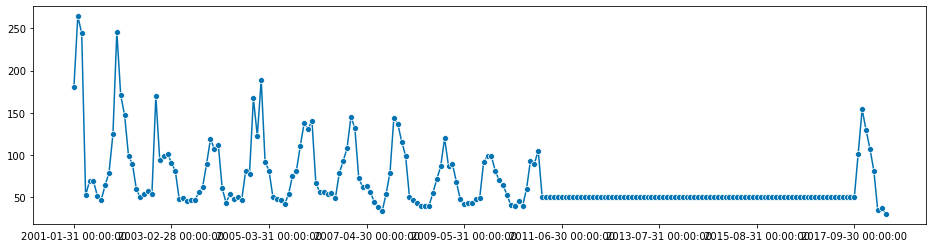

In [65]:
plot_series(processed_list[8])

In [66]:
EvaluateModels(processed_list[8])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.11535954632344445,0.21804769872060673,0.11535954632344445


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

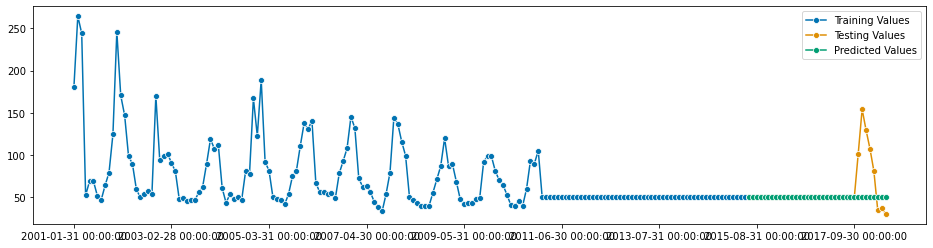

In [67]:
x_train, x_test = temporal_train_test_split(processed_list[8], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [68]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.11535954632344445


# A Machine Learning forecasting model for Nitrous oxides pollutant in station Moratalaz

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

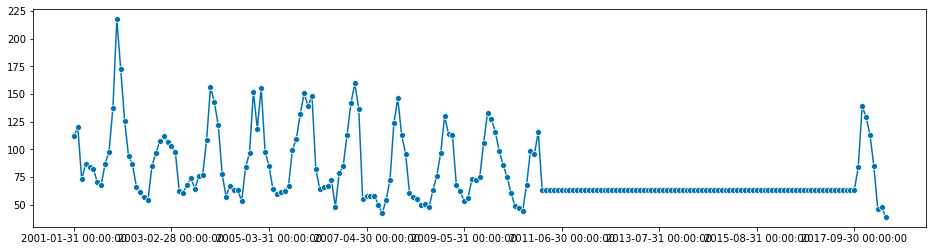

In [69]:
plot_series(processed_list[9])

In [70]:
EvaluateModels(processed_list[9])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.0914207728240364,0.17970669571298037,0.0914207728240364


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

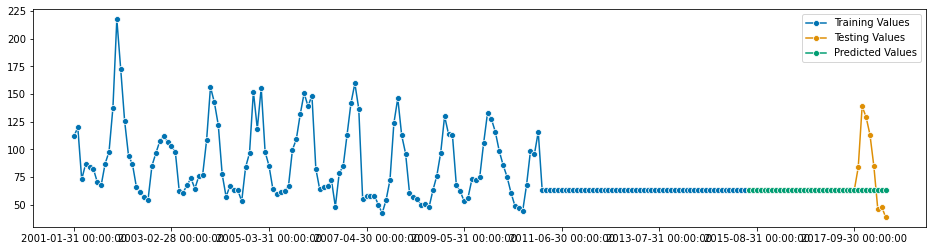

In [71]:
x_train, x_test = temporal_train_test_split(processed_list[9], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [72]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.0914207728240364


In [73]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.0914207728240364


# A Machine Learning forecasting model for Nitrous oxides pollutant in station pza de espa

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

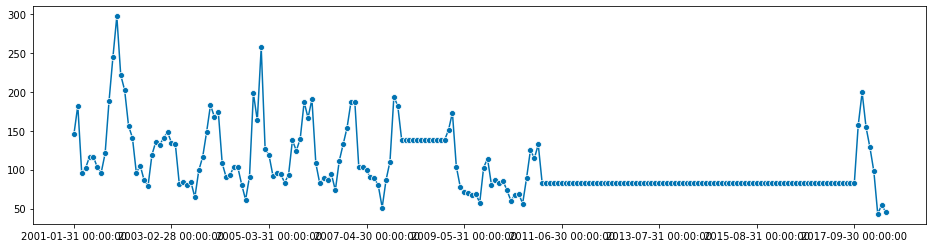

In [74]:
plot_series(processed_list[11])

In [75]:
EvaluateModels(processed_list[11])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.11858322836798418,0.22820094229358073,0.11858322836798418


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

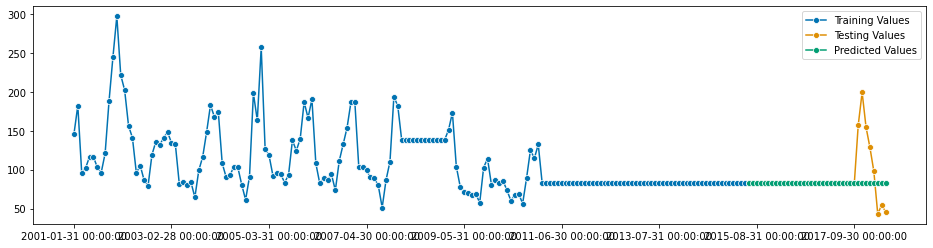

In [76]:
x_train, x_test = temporal_train_test_split(processed_list[11], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [77]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.11858322836798418


# A Machine Learning forecasting model for Nitrous oxides pollutant in station pza de carmen

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

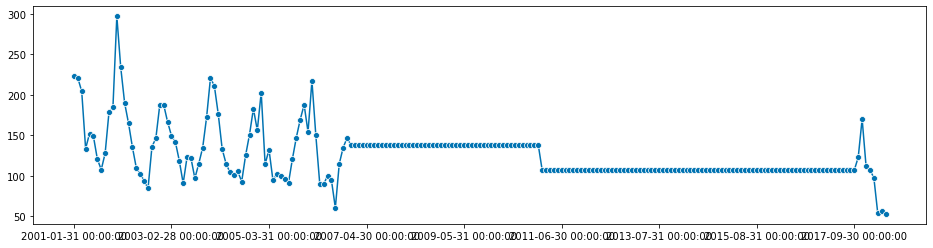

In [78]:
plot_series(processed_list[12])

In [79]:
EvaluateModels(processed_list[12])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.09805742312432329,0.1808281641967558,0.09805742312432329


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

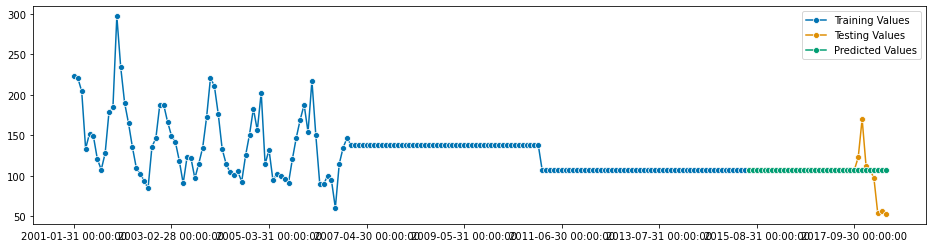

In [80]:
x_train, x_test = temporal_train_test_split(processed_list[12], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [81]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.09805742312432329


# A Machine Learning forecasting model for Nitrous oxides pollutant in station vallecas

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

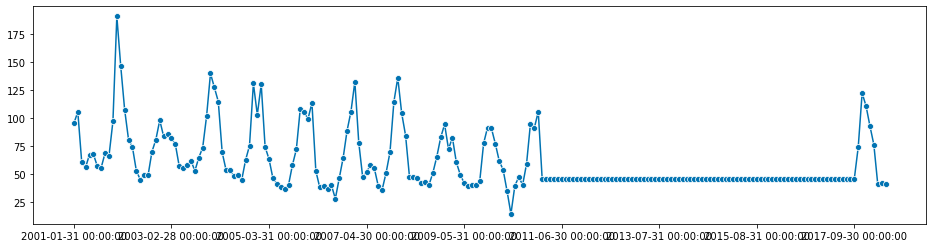

In [82]:
plot_series(processed_list[13])

In [83]:
EvaluateModels(processed_list[13])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.0781985138121679,0.18799889763392263,0.0781985138121679


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

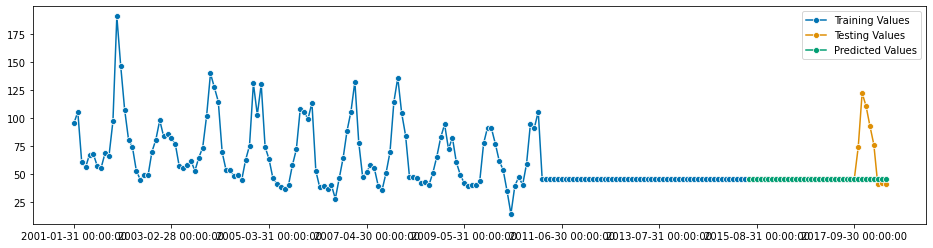

In [84]:
x_train, x_test = temporal_train_test_split(processed_list[13], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [85]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.0781985138121679


# A Machine Learning forecasting model for Nitrous oxides pollutant in station villaverde

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

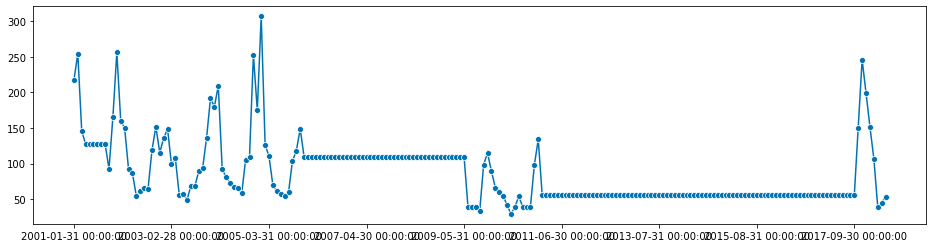

In [86]:
plot_series(processed_list[14])

In [87]:
EvaluateModels(processed_list[14])

The mean absolute percentage  for  Random Foreest ,Linear regreession and K Nearest Neighbor are 0.10969227603818943,0.20453831912768627,0.10969227603818943


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

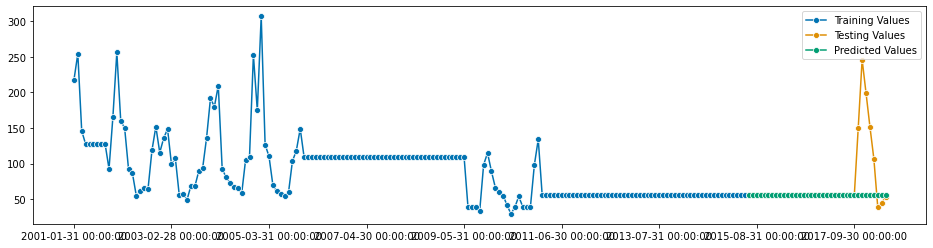

In [88]:
x_train, x_test = temporal_train_test_split(processed_list[14], test_size=36)
reduced_reg = make_reduction(KNeighborsRegressor(n_neighbors=3) , window_length=10, strategy = 'recursive')
reduced_reg.fit(x_train)
sh = list(range(1,37))
y_pred = reduced_reg.predict(sh)
plot_series(x_train, x_test, y_pred, labels = ["Training Values", "Testing Values", "Predicted Values"])

In [89]:
print("The mean percentage error is {}".format(mean_absolute_percentage_error(x_test, y_pred)))

The mean percentage error is 0.10969227603818943
